<a href="https://colab.research.google.com/github/ram05007/ML-Prediction-Models/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('weatherAUS.csv')
df.head()

df.info()

df.isnull().sum()




Saving weatherAUS.csv to weatherAUS.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  fl

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [ ]:

missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.4].index
df.drop(columns=cols_to_drop, inplace=True)

print(df.head())
df.isnull().sum()

         Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3p

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566
WindDir3pm,4228
WindSpeed9am,1767


In [ ]:

num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
            'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm','Cloud9am']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


cat_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


df.dropna(subset=['RainTomorrow'], inplace=True)

df.isnull().sum()


/tmp/ipython-input-3-1567534999.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3-1567534999.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


In [ ]:
df['Location'].unique()


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:

df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})


df = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True)




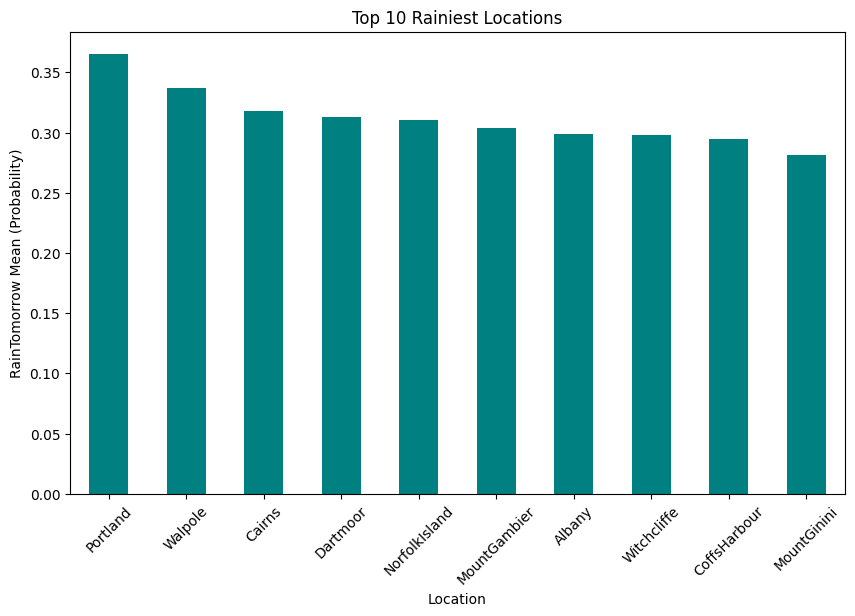

In [ ]:
top_locations = df.groupby('Location')['RainTomorrow'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='teal')
plt.title("Top 10 Rainiest Locations")
plt.ylabel("RainTomorrow Mean (Probability)")
plt.xticks(rotation=45)
plt.show()


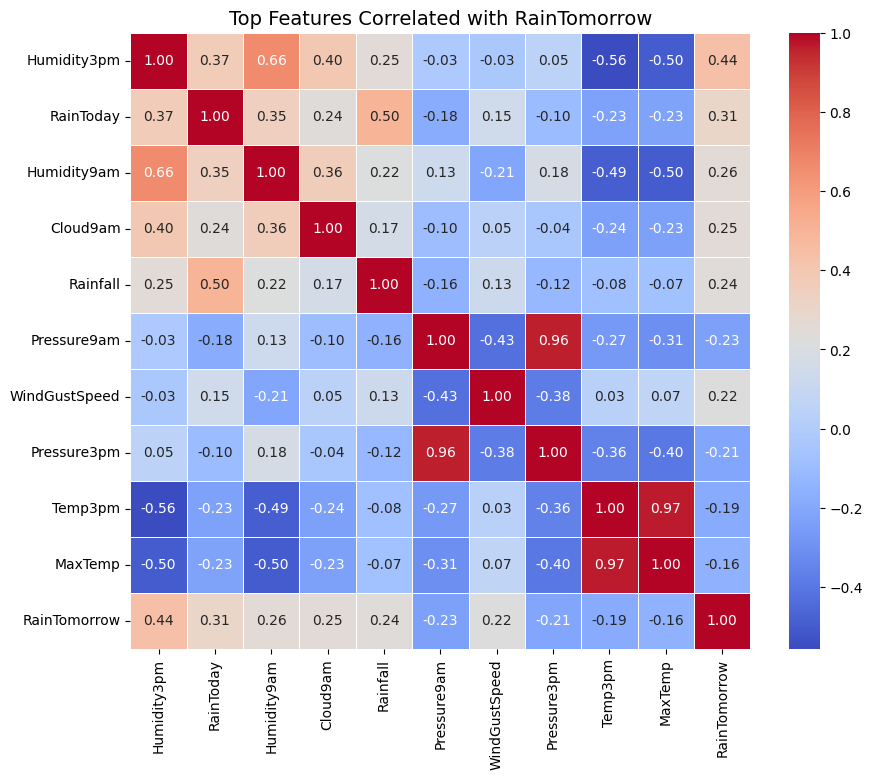

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df.corr(numeric_only=True)


cor_target = corr_matrix['RainTomorrow'].drop('RainTomorrow')


top_features = cor_target.abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features.tolist() + ['RainTomorrow']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Top Features Correlated with RainTomorrow", fontsize=14)
plt.show()


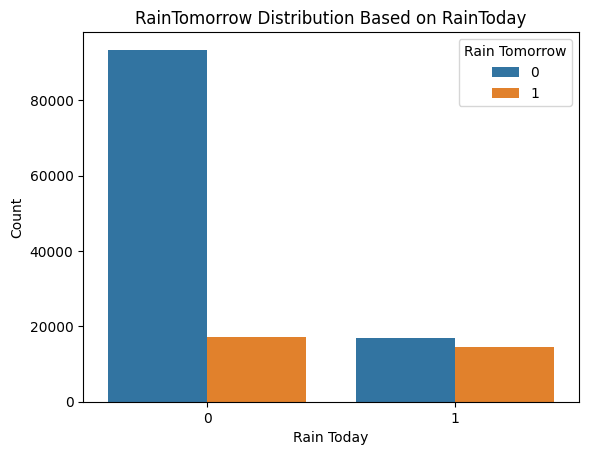

In [ ]:
sns.countplot(x='RainToday', hue='RainTomorrow', data=df)
plt.title("RainTomorrow Distribution Based on RainToday")
plt.xlabel("Rain Today")
plt.ylabel("Count")
plt.legend(title="Rain Tomorrow")
plt.show()


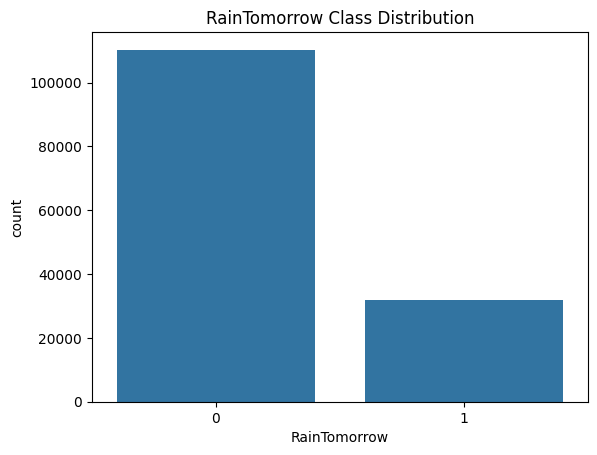

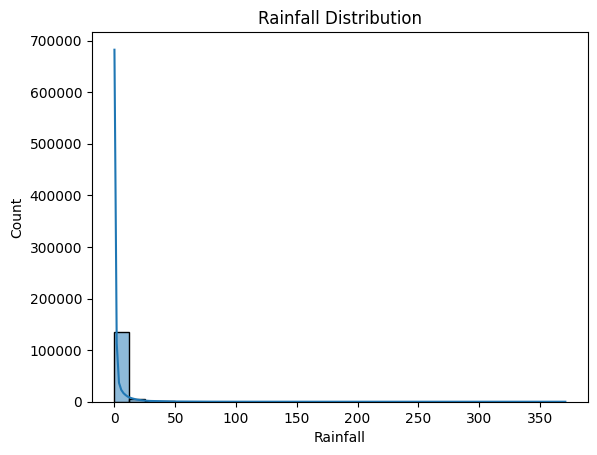

In [ ]:
sns.countplot(x='RainTomorrow', data=df)
plt.title('RainTomorrow Class Distribution')
plt.show()

sns.histplot(df['Rainfall'], bins=30,kde = True)
plt.title('Rainfall Distribution')
plt.show()


In [ ]:


df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek

df['IsWetSeason'] = df['Month'].apply(lambda x: 1 if x in [6, 7, 8, 9] else 0)

df = pd.get_dummies(df, columns=['Location'])

df = df.drop(columns=['Date'])



X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


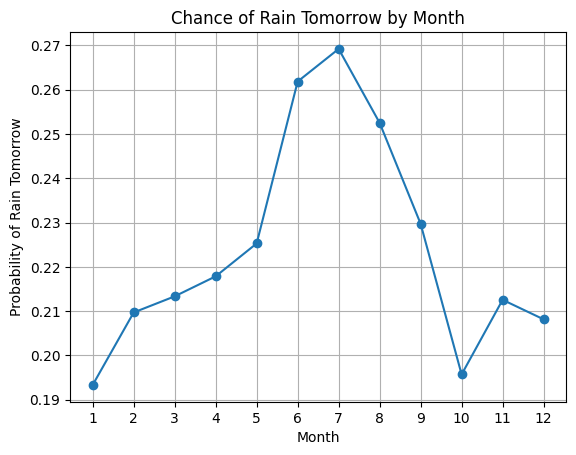

In [ ]:
monthly_rain = df.groupby('Month')['RainTomorrow'].mean()

plt.plot(monthly_rain.index, monthly_rain.values, marker='o')
plt.title('Chance of Rain Tomorrow by Month')
plt.xlabel('Month')
plt.ylabel('Probability of Rain Tomorrow')
plt.xticks(range(1,13))
plt.grid()
plt.show()


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8528077639860755

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     22098
           1       0.77      0.49      0.60      6341

    accuracy                           0.85     28439
   macro avg       0.82      0.72      0.75     28439
weighted avg       0.84      0.85      0.84     28439



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


log_reg = LogisticRegression(max_iter=1000)


log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.840254579978199

Confusion Matrix:
 [[20820  1278]
 [ 3265  3076]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     22098
           1       0.71      0.49      0.58      6341

    accuracy                           0.84     28439
   macro avg       0.79      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)


print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.858328351911108

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     22098
           1       0.75      0.55      0.63      6341

    accuracy                           0.86     28439
   macro avg       0.81      0.75      0.77     28439
weighted avg       0.85      0.86      0.85     28439


XGBoost Confusion Matrix:
 [[20909  1189]
 [ 2840  3501]]


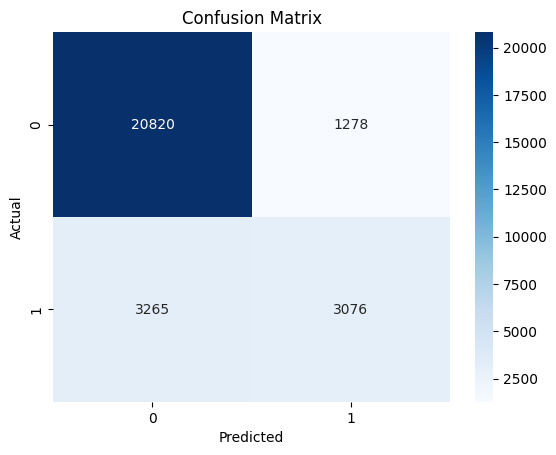

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


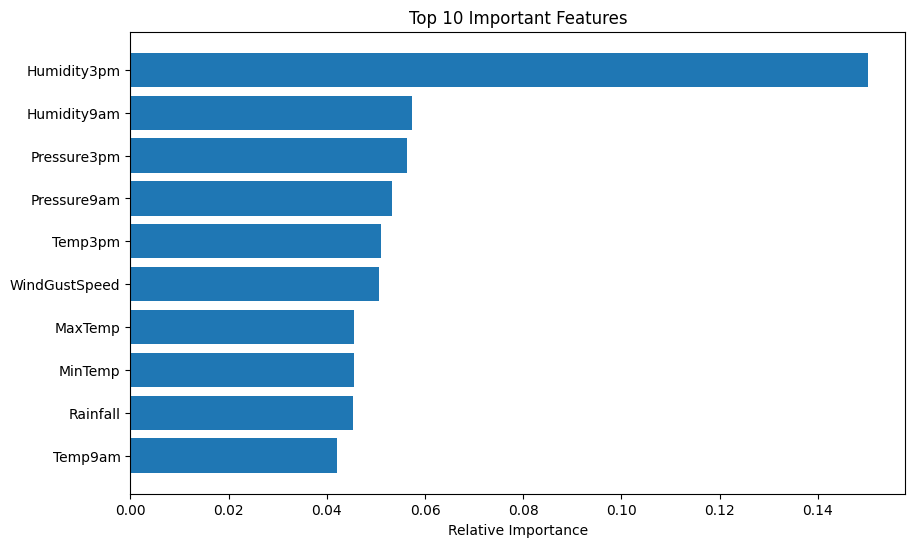

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10,6))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [ ]:
sample_input = X_train.iloc[0].copy()
sample_input['MinTemp'] = 28.3
sample_input['MaxTemp'] = 43.8
sample_input['Rainfall'] = 0
sample_input['WindGustSpeed'] = 73
sample_input['Humidity9am'] = 43
sample_input['Humidity3pm'] = 79
sample_input['Pressure9am'] = 992
sample_input['Pressure3pm'] = 1030
sample_input['Month'] = 7
sample_input['IsWetSeason'] = 1


for col in X.columns:
    if col.startswith("Location_"):
        sample_input[col] = 0
sample_input['Location_Melbourne'] = 1


sample_df = pd.DataFrame([sample_input])
sample_prediction = model.predict(sample_df)[0]


print("\nCustom Sample Prediction:")
print("Will it rain tomorrow?", "Yes" if sample_prediction == 1 else "No")


Custom Sample Prediction:
Will it rain tomorrow? Yes
